In [1]:
using Pkg
Pkg.instantiate()
using Plots
using LinearAlgebra

In [2]:
include("source/spikes.jl")

γ (generic function with 1 method)

In [3]:
function stimcurve(x, T)
    if x >= 0 && x <= T
        return 4 / 5 * x - 40
    else # We make stimcurve(T + t) = stimcurve(t)
        return 4 / 5 * (x % T) - 40
    end
end

st(x) = stimcurve(x, 100)


st (generic function with 1 method)

In [4]:
tuncurve = TuningCurve(2, 0, 2)
h(x) = sin(0.1x)
h(x) = 3x - 40
Omega = SpikeMatrix(100, 0.1, tuncurve, st)
X = Omega.X

1001×1001 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0 

In [124]:
Omega.D

1001×1001 Diagonal{ComplexF64, Vector{ComplexF64}}:
 -3.20971-0.160669im           ⋅           …          ⋅                 ⋅    
          ⋅           -3.20971+0.160669im             ⋅                 ⋅    
          ⋅                    ⋅                      ⋅                 ⋅    
          ⋅                    ⋅                      ⋅                 ⋅    
          ⋅                    ⋅                      ⋅                 ⋅    
          ⋅                    ⋅           …          ⋅                 ⋅    
          ⋅                    ⋅                      ⋅                 ⋅    
          ⋅                    ⋅                      ⋅                 ⋅    
          ⋅                    ⋅                      ⋅                 ⋅    
          ⋅                    ⋅                      ⋅                 ⋅    
          ⋅                    ⋅           …          ⋅                 ⋅    
          ⋅                    ⋅                      ⋅                 ⋅    
          ⋅ 

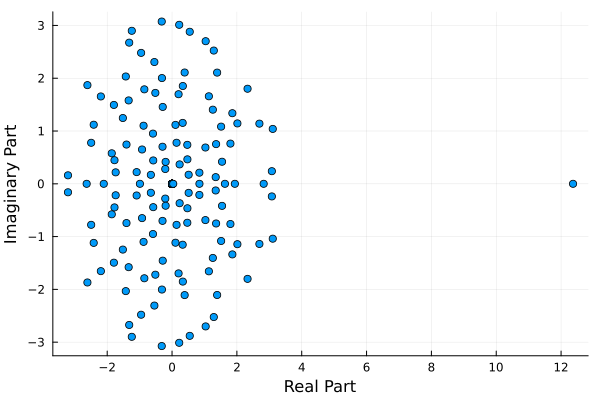

In [125]:
scatter(real.(Omega.eigenvalues), imag.(Omega.eigenvalues), xlabel="Real Part", ylabel="Imaginary Part", legend=false)

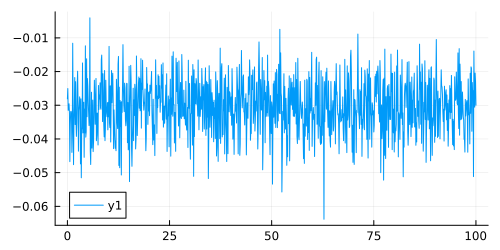

In [126]:
eigvec = real.(Omega.eigenvectors[:, end])
plot(Omega.t, (eigvec), size=(500, 250))

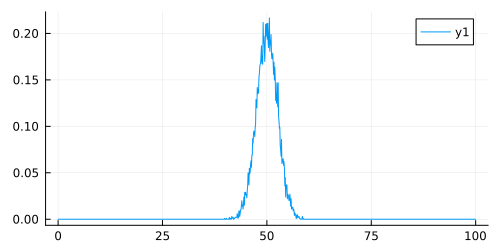

In [5]:
plot(Omega.t, vec(sum(X, dims=1) ./ 1001), size=(500, 250))

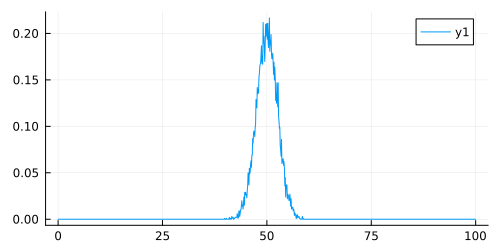

In [6]:
plot(Omega.t, Omega.avg_spike_train, size=(500, 250))

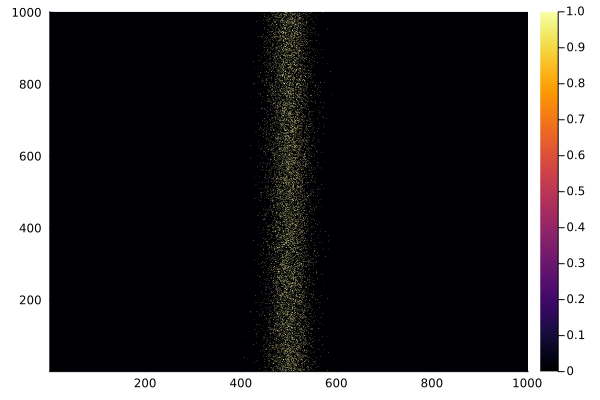

In [128]:
heatmap(X)

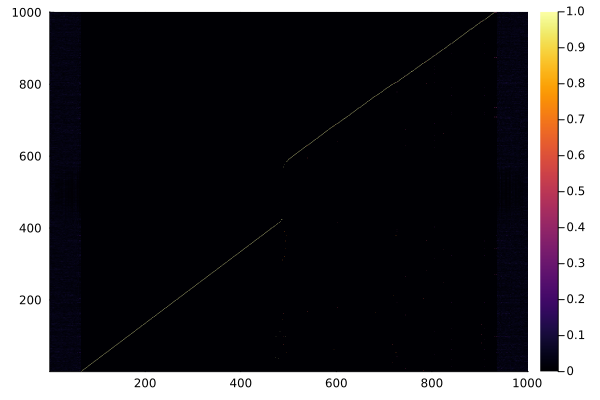

In [129]:
heatmap(abs.(Omega.eigenvectors))

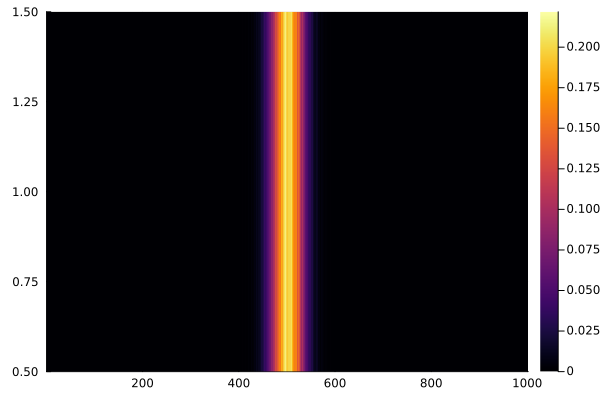

In [134]:
heatmap(sum(X ./ 1001, dims=1))

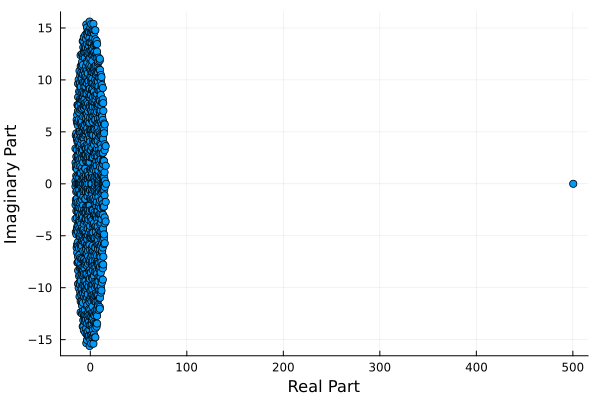

In [187]:
eigenvalues = eigen(random_matrix).values
#scatter(eigenvalues, eigenvalues, xlabel="Index", ylabel="Eigenvalue", title="Eigenvalues of Random Matrix")
scatter(real.(eigenvalues), imag.(eigenvalues), xlabel="Real Part", ylabel="Imaginary Part", legend=false)

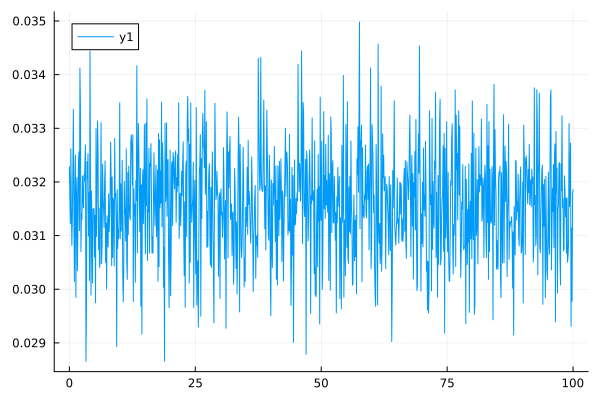

In [188]:
plot(Omega.t, real.(eigen(random_matrix).vectors[:, end]))